In [98]:
import cv2
import os
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image

Dataset Folders and Classes

In [99]:
folder = './Fer2013'
train_folder = './Fer2013/train'
test_folder = './Fer2013/test'

classes = os.listdir(train_folder)
print(classes)

['angry', 'disgust', 'fear', 'happy', 'neutral', 'sad', 'surprise']


Plotting the number of data in each class

In [100]:
train_class_counts = {class_name: len(os.listdir(os.path.join(train_folder, class_name))) 
                      for class_name in classes}
print(train_class_counts)

{'angry': 3995, 'disgust': 436, 'fear': 4097, 'happy': 7215, 'neutral': 4965, 'sad': 4830, 'surprise': 3171}


<Axes: title={'center': 'Class Counts in Training Dataset'}>

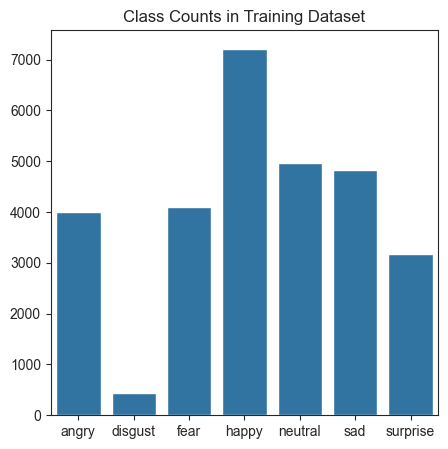

In [101]:
plt.figure(figsize=(5,5))
plt.title('Class Counts in Training Dataset')
sns.barplot(x=list(train_class_counts.keys()), y=list(train_class_counts.values()))


Displaying images of each class

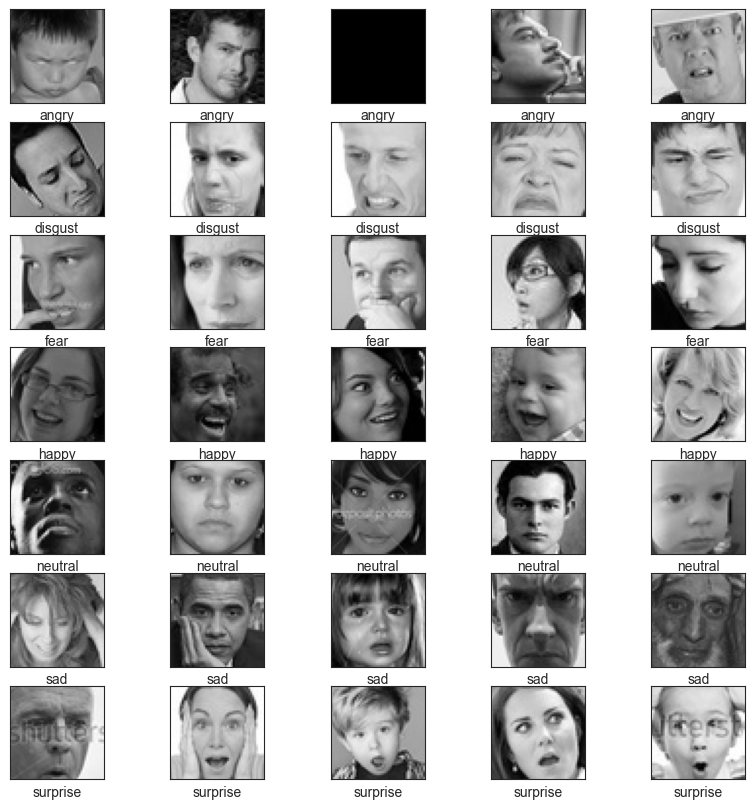

In [102]:
def display_images(sample_size):
    plt.figure(figsize=(10,10))
    img_list = []
    for class_name in classes:
        class_path = os.path.join(train_folder, class_name)
        img_list.extend(os.listdir(class_path)[:sample_size])
        for i, image in enumerate(img_list):
            img = cv2.imread(os.path.join(class_path,image))
            if img is not None:
                plt.subplot(len(classes), sample_size, i+1)
                plt.xticks([])
                plt.yticks([])
                plt.imshow(img)
                plt.xlabel(class_name)
    plt.show()
    
display_images(5)

In [103]:
sample = cv2.imread('./Fer2013/train/disgust/Training_680349.jpg')
sample.shape

(48, 48, 3)

In [104]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

batch_size =128
train_datagen = ImageDataGenerator(
                rescale = 1./255,
                rotation_range = 30,
                width_shift_range = 0.2,
                height_shift_range = 0.2,
                horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

train_generator = train_datagen.flow_from_directory(train_folder,
                                                   batch_size = batch_size,
                                                   class_mode = 'categorical',
                                                   color_mode = 'grayscale',
                                                   target_size = (48,48),
                                                   shuffle=True)

test_generator = test_datagen.flow_from_directory(test_folder,
                                                 batch_size = batch_size,
                                                 class_mode = 'categorical',
                                                 color_mode = 'grayscale',
                                                 target_size = (48,48),
                                                 shuffle=False)


Found 28709 images belonging to 7 classes.
Found 7178 images belonging to 7 classes.


Creating Model

In [131]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import models, layers

In [134]:
# # model = tf.keras.applications.MobileNetV2()
model = models.Sequential()

model.add(layers.Conv2D(64,(3,3),activation='relu',input_shape = (48,48,1)))
model.add(layers.MaxPooling2D(2,2))
model.add(layers.BatchNormalization())

model.add(layers.Conv2D(128,(3,3),activation='relu'))
model.add(layers.MaxPooling2D(2,2))
model.add(layers.BatchNormalization())
model.add(layers.Dropout (0.25))

model.add(layers.Conv2D(128,(3,3),activation='relu'))
model.add(layers.MaxPooling2D(2,2))
model.add(layers.BatchNormalization())
model.add(layers.Dropout (0.25))

model.add(layers.Conv2D(256,(3,3),activation='relu'))
model.add(layers.MaxPooling2D(2,2))
model.add(layers.BatchNormalization())

model.add(layers.Flatten())

model.add(layers.Dense(128,activation='relu'))
model.add(layers.Dropout(0.25))

model.add(layers.Dense(64,activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.Dropout(0.25))

model.add(layers.Dense(32,activation='relu'))
model.add(layers.Dense(7, activation='softmax'))

model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_9 (Conv2D)           (None, 46, 46, 64)        640       
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 23, 23, 64)       0         
 2D)                                                             
                                                                 
 batch_normalization_9 (Batc  (None, 23, 23, 64)       256       
 hNormalization)                                                 
                                                                 
 conv2d_10 (Conv2D)          (None, 21, 21, 128)       73856     
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 10, 10, 128)      0         
 2D)                                                             
                                                      

In [135]:
model.compile(optimizer = 'adam',
                 loss = 'categorical_crossentropy',
                 metrics = ['accuracy'])

In [136]:
history = model.fit(train_generator, 
                        validation_data=test_generator,
                        epochs=25,
                        verbose=2)

Epoch 1/25
225/225 - 418s - loss: 1.9130 - accuracy: 0.2259 - val_loss: 1.8786 - val_accuracy: 0.2471 - 418s/epoch - 2s/step
Epoch 2/25
225/225 - 73s - loss: 1.7895 - accuracy: 0.2583 - val_loss: 1.7892 - val_accuracy: 0.2530 - 73s/epoch - 324ms/step
Epoch 3/25
225/225 - 72s - loss: 1.7188 - accuracy: 0.3026 - val_loss: 1.6440 - val_accuracy: 0.3442 - 72s/epoch - 320ms/step
Epoch 4/25
225/225 - 70s - loss: 1.6436 - accuracy: 0.3419 - val_loss: 1.5372 - val_accuracy: 0.3980 - 70s/epoch - 309ms/step
Epoch 5/25
225/225 - 69s - loss: 1.5683 - accuracy: 0.3809 - val_loss: 1.5232 - val_accuracy: 0.4078 - 69s/epoch - 309ms/step
Epoch 6/25
225/225 - 47s - loss: 1.5052 - accuracy: 0.4121 - val_loss: 1.6829 - val_accuracy: 0.3604 - 47s/epoch - 211ms/step
Epoch 7/25
225/225 - 47s - loss: 1.4606 - accuracy: 0.4340 - val_loss: 1.2821 - val_accuracy: 0.5134 - 47s/epoch - 209ms/step
Epoch 8/25
225/225 - 44s - loss: 1.4120 - accuracy: 0.4547 - val_loss: 1.3952 - val_accuracy: 0.4650 - 44s/epoch - 196m

In [137]:
model.save('Fer_model.h5')

In [138]:
new_model = tf.keras.models.load_model('Fer_model.h5')

Plotting Accuracies & Losses

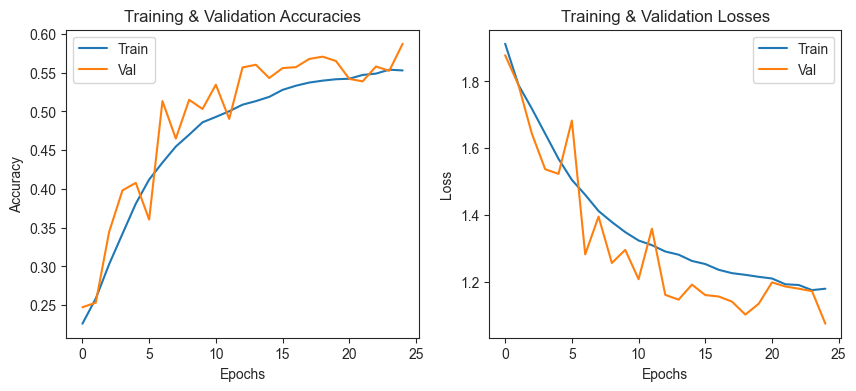

In [163]:
fig, ax = plt.subplots(1,2, figsize=(10,4))

train_acc = history.history['accuracy']
train_loss = history.history['loss']

val_acc = history.history['val_accuracy']
val_loss = history.history['val_loss']

ax[0].plot(train_acc)
ax[0].plot(val_acc)
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('Accuracy')
ax[0].set_title('Training & Validation Accuracies')
ax[0].legend(['Train','Val'])

ax[1].plot(train_loss)
ax[1].plot(val_loss)
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('Loss')
ax[1].set_title('Training & Validation Losses')
ax[1].legend(['Train','Val'])

plt.show()

Testing the model on some images

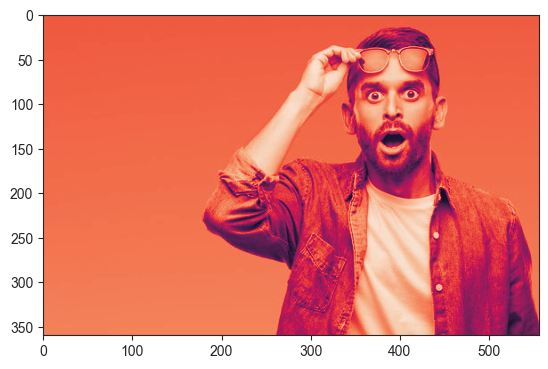

In [140]:
frame = cv2.imread('./Emotion test images/surprise.jpg', cv2.IMREAD_GRAYSCALE)
plt.imshow(frame)

Classifier for Face Detection

In [141]:
import pathlib

cascade_path = pathlib.Path(cv2.__file__).parent.absolute() / "data/haarcascade_frontalface_default.xml"
haar_cascade = cv2.CascadeClassifier(str(cascade_path))

In [142]:
face = haar_cascade.detectMultiScale(frame,
                                    scaleFactor=1.1,
                                    minNeighbors=5,
                                    minSize=(30,30),
                                    flags=cv2.CASCADE_SCALE_IMAGE)
print(face)

[[334  42 120 120]]


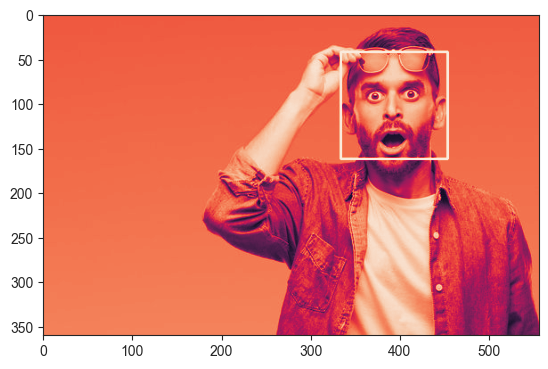

In [143]:
for (x,y,w,h) in face:
    cv2.rectangle(frame, (x,y), (x+w,y+h),(255,255,255),2)
plt.imshow(frame)

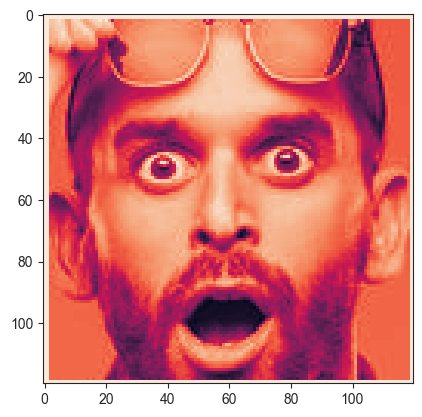

In [144]:
face_frame = frame[y:y+w,x:x+h]
plt.imshow(face_frame)

In [145]:
face_frame.shape

(120, 120)

In [146]:
final_image = cv2.resize(face_frame, (48,48))
final_image = np.expand_dims(final_image, axis=0)
final_image = final_image/255
print(final_image.shape)

(1, 48, 48)


In [147]:
prediction = new_model.predict(final_image)

1/1 [==============================] - 0s 90ms/step


In [148]:
prediction

array([[5.7118543e-04, 7.7776982e-05, 4.8320301e-02, 1.7287400e-04,
        5.6579695e-05, 1.8502225e-04, 9.5061630e-01]], dtype=float32)

In [149]:
classes[np.argmax(prediction)]

'surprise'

Testing the model on webcam

In [151]:
def face_detect():
    camera = cv2.VideoCapture(0)

    while True:
        ret, frame = camera.read()
        gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
        faces = haar_cascade.detectMultiScale(
            gray,
            scaleFactor = 1.1,
            minNeighbors = 5,
            minSize = (30,30),
            flags = cv2.CASCADE_SCALE_IMAGE
        )

        for (x,y,w,h) in faces:
            
            detected_face = gray[y:y+w,x:x+h]
            final_image = cv2.resize(detected_face, (48,48))
            final_image = np.expand_dims(final_image, axis=0)
            final_image = final_image/255
            prediction = new_model.predict(final_image)
            emotion = classes[np.argmax(prediction)]
            cv2.rectangle(frame, (x,y), (x+w,y+h),(255,255,255),2)
            cv2.putText(frame, str(emotion), (x,y), cv2.FONT_HERSHEY_SIMPLEX, 2, (0,255,0),3)
        cv2.imshow("Emotion Detector", frame)
        if cv2.waitKey(1) == ord("q"):
            break

    camera.release()
    cv2.destroyAllWindows()

face_detect()

1/1 [==============================] - 0s 14ms/step
